<a href="https://colab.research.google.com/github/azizulkawser/Deep_Learning/blob/main/DL2023_assign1_KAWSER_2207846.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning 2023 - Assignment 1

Designed by Marko Savic (marko.savic@oulu.fi)



## Outline (15 points)
#### In this assignment, you will learn:
* How to load data and create a train/test split.
* How to build your own Pytorch model for simple linear regression problem.
* Training the model with gradient descent algorithm in Pytorch.

#### Environment
Python 3 + Pytorch (>=1.3), Jupyter notebook.<br>
Other libraries should be installed correctly such as numpy, matplotlib, *etc*., according to the dependencies of the assignment. Check slides of lecture 3 on how to set up an environment with the right dependencies<br>
If you haven’t installed Pytorch and Jupyter notebook in your computer, an alternative environment to finish the assignment is CSC notebook: [`https://notebooks.csc.fi/`](https://notebooks.csc.fi/) -> log in with HaKa using your university account -> Jupyter Machine Learning.
Also, google colab is available through your google university account (instruction in patio https://patio.oulu.fi/en/services-and-instructions/it-services/information-systems/google-workspace-education). Computer room TS135 contains computers with GPUs that you can utilise as well.

We will give 2 weeks for each assignment and more for the final project. So it may happen where the new assignment is published before the deadline of the previous assignment. The answer will be released after the deadline.
Please also put your name and student number (if have) in the file name of the returned assignments.(DL2023_assign1_Name_Surname_studentnumber.ipynb)

#### Database
* Diabetes dataset

#### Hints
* To find the place where you have to insert your solution, hit Crtl + F and search for **TODO:** . You are not supposed to modify the codes from other parts.
* Be careful with the shape of the weights, gradient, .. of your tensor in your implementation. Double check and make sure the shapes fit for computation, especially matrix multiplication.

## Part 1. Load dataset and split into training and testing sets

Suppose we observe a set of n real-valued input variables x = $\{x_n\}$ and wish to use this observation to predict
the value of a real-valued target variable $y$. In the tutorial we considered artifical examples with synthetic data. In this exercise we will consider a simple dataset that is suitable for linear regression.

We will take the Diabetes dataset which contains ten baseline variables: age, sex, body mass index, average blood pressure, and six blood serum measurements that were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline. Assuming a linear model is a good representation of this phenomenon we will try predict diabetes disease progression.

The dataset is already preprocessed and available with the scikit-learn library. Firstly we will import the entire dataset of 442 instances, and then split the data into training and testing sets. In this case we choose a five fold split, meaning we will use 20% of the data for testing and 80% for training.

Please create the required training and testing data below and plot the relationship between the feature 'bmi' and the target. Since we have 10 different features, we will only pick 'bmi' for plotting.

In [ ]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import numpy as np
from sklearn.datasets import load_diabetes

diabetes_db  = load_diabetes()
print(diabetes_db.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
diabetes_db.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
print(diabetes_db.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
print(diabetes_db.data[:, 2]) # BMI data

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215 -0.08380842  0.01750591
 -0.02884001 -0.00189471 -0.02560657 -0.01806189  0.04229559  0.01211685
 -0.0105172  -0.01806189 -0.05686312 -0.02237314 -0.00405033  0.06061839
  0.03582872 -0.01267283 -0.07734155  0.05954058 -0.02129532 -0.00620595
  0.04445121 -0.06548562  0.12528712 -0.05039625 -0.06332999 -0.03099563
  0.02289497  0.01103904  0.07139652  0.01427248 -0.00836158 -0.06764124
 -0.0105172  -0.02345095  0.06816308 -0.03530688 -0.01159501 -0.0730303
 -0.04177375  0.01427248 -0.00728377  0.0164281  -0.00943939 -0.01590626
  0.0250506  -0.04931844  0.04121778 -0.06332999 -0.06440781 -0.02560657
 -0.00405033  0.00457217 -0.00728377 -0.0374625  -0.02560657 -0.02452876
 -0.01806189 -0.01482845 -0.02991782 -0.046085   -0.06979687  0.03367309
 -0.00405033 -0.02021751  0.00241654 -0.03099563  0.02828403 -0.03638469
 -0.05794093 -0.0374625   0.01211685 -0.02237314 -0.

In [ ]:
diabetes_db['data'].shape

(442, 10)

In [ ]:
diabetes_db['target'].shape

(442,)

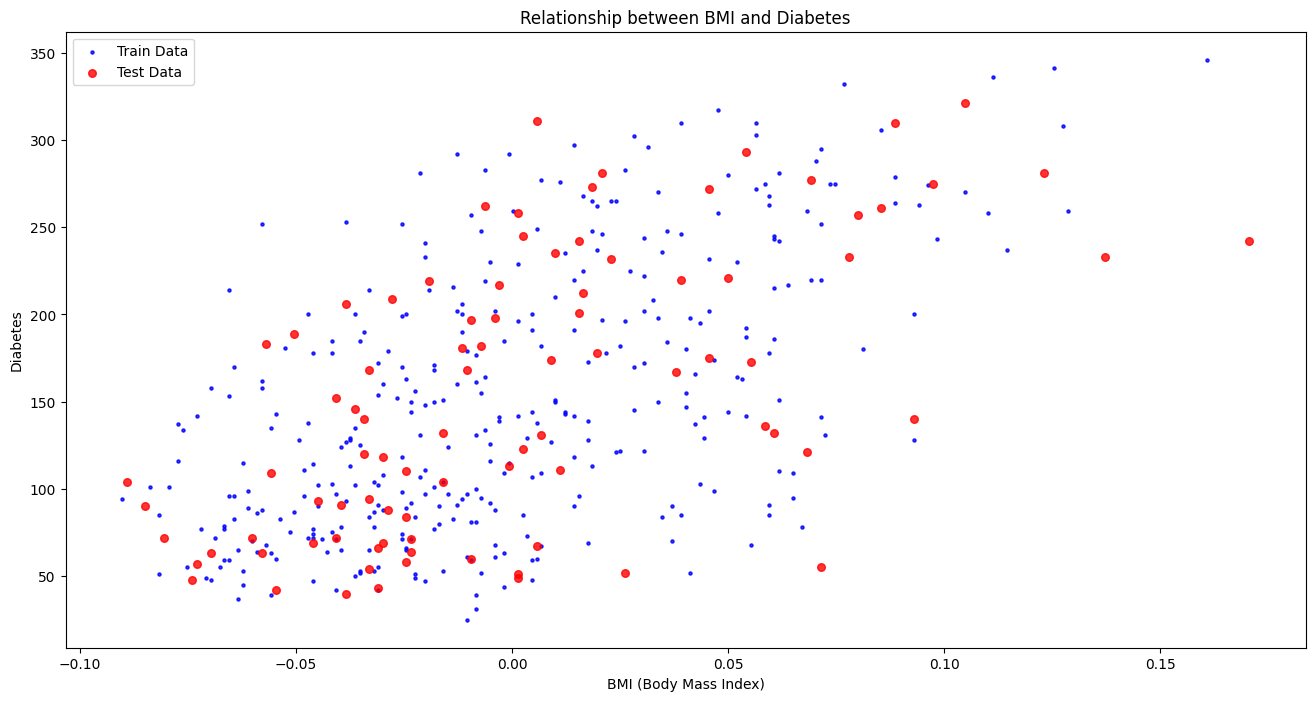

In [ ]:
# TODO: (3 points, details are given below):

# import required library
# from sklearn.model_selection import train_test_split
import random

# get the relevant data from the diabetes_db dictionary and assign them to the Tensors x (feature variables) and y (target)  (1 point)

# Extract feature variables from the diabetes dataset and convert to a tensor
x = torch.tensor(diabetes_db.data, dtype=torch.float32)
# Extract target variable from the diabetes dataset and convert to a tensor
y = torch.tensor(diabetes_db.target, dtype=torch.float32)


# divide the data in a train set (80% of the data) and test set (20% of the data). Resulting in x_train, x_test, y_train, y_test (1 point)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Combine features and targets into a list of tuples
data = list(zip(x.tolist(), y.tolist()))
# Calculate the number of samples for the training set (80%)
train_size = int(0.8 * len(data))
# Split data into training and test sets
train_data, test_data = data[:train_size], data[train_size:]
# Unpack the features and targets for training and test sets
x_train, y_train = zip(*train_data)
x_test, y_test = zip(*test_data)
# Convert the lists back to tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


# plot the third feature 'bmi' in relationship with the target y. Train and test data should be in a single figure with two different showing styles (1 point)


# Create a figure with a specified size
plt.figure(figsize=(16, 8))
# Plotting train set with small blue dots and test set with large blue dot to diffentite visualization.
# Plot the third feature 'bmi' (diabetes_db['data'][:,2]) in relationship with the target y
plt.scatter(x_train[:, 2], y_train, label='Train Data', color='blue', s=5, alpha=0.8)
plt.scatter(x_test[:, 2], y_test, label='Test Data', color='red', s=30, alpha=0.8)

# Set plot title and axis labels
plt.title('Relationship between BMI and Diabetes')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Diabetes')
plt.legend()
plt.show()


In [ ]:
print(x_train.size())
print(y_train.size())
print(x_test.size())
print(y_test.size())

torch.Size([353, 10])
torch.Size([353])
torch.Size([89, 10])
torch.Size([89])


## Part 2. Solving the linear regression problem in Pytorch using Gradient Descent Algorithm
Congratulations you have prepared the data correctly! Now we will move onto creating our model and training it.

### 2.1 Model
In this part, you will define your own model class. To do that, you have to remember the following rules:
1. The model class should be inherited from [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module);
2. Re-write the **\_\_init\_\_** function and the **forward** function;
3. In the **\_\_init\_\_** function, you should always call the parent's **\_\_init\_\_** function first.

To make it simpler, since we are using a linear function to approximate the phenomenon that generated the data, our function will be:

\begin{align*}
y = w^T x + b
\end{align*}

Therefore, in the model, we need to set 2 parameters: $w$, $b$

In [ ]:
# TODO (3.5 points, details are given below)
import torch.nn as nn


# define a class (0.5) + write the __init__ function (1.5 point) + write the forward function (1.5 points)
class Model(nn.Module):
    def __init__(self):
        # Call the parent class constructor
        super(Model, self).__init__()
        # Define the parameters w and b
        self.w = nn.Parameter(torch.randn(10))
        self.b = nn.Parameter(torch.randn(1))

    def forward(self, x):
        y = torch.matmul(x, self.w.t()) + self.b
        return y

### 2.2 Training
Here, you will train your model based on the training data and evaluate the model on testing data.
1. Set proper number of iterations and learning rate.
2. Remember to use a proper optimizer (you may have many choices: Adam, SGD, RMSprop, ... please find the detailed information in https://pytorch.org/docs/stable/optim.html and know how to use them).
3. In order to train the model, a loss function should be defined:
\begin{align*}
loss = \frac{1}{N}\sum_{i=1}^{N}|f_i - y_i|,
\end{align*}
where, $f_i$ is the output of the model and $N$ is the number of training data pairs.
4. The model must be trained only using training data.
5. Remember to clear the old gradients of parameters before a new backward propagation.
6. In every certain number of iterations, print the training loss, and the testing loss.
7. Meanwhile, please track the training loss and the testing loss in each iteration. Once the training is done, the curves of losses should be plotted (two curves are drawn in the same figure, where x axis indicates iterations and y axis indicates the losses).
8. Lastly, draw all the training data, testing data and the curve of the trained model in the same figure (use different showing styles to distinguish them).

In [ ]:
# TODO (8.5 points, details are given below)
import torch.optim as optim
# Make a instance of the model class (0.5 point)

model = Model()

# create an optimizer, set a workable learing rate (0.5 point + 0.5 point)

# Set a workable learning rate
learning_rate = 0.1
# Create an optimizer with the specified learning rate
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)

# defined loss function as stated in instruction
# def loss_function(output, target):
#     N = len(target)
#     return torch.sum(torch.abs(output - target)) / N

def loss_function(output, targets):
    absolute_diff = torch.abs(output - targets)
    loss = torch.mean(absolute_diff)
    return loss


training_losses = []
testing_losses = []

n_itr = 10000

for i in range(n_itr):

    # Train
    # forward propagation
    model.train()  # change model to train mode

    # calculate the output of model (0.5 point)
    output = model(x_train)

    # calculate loss according to the above equation (0.5 point)
    # loss = loss_function(output, y_train)
    loss = loss_function(output, y_train)

    training_losses.append(loss.item())

    # Backward propagation
    # clear old gradients (0.5)
    optimizer.zero_grad()
    # calculate gradients of parameters (1 point)
    loss.backward()
    # gradient descent algorithm (1 point)
    optimizer.step()

    # Evaluate, calculate the testing loss (0.5 point)
    model.eval()  # change model to eval mode
    with torch.no_grad():
        test_output = model(x_test)
        test_loss = loss_function(test_output, y_test)

    testing_losses.append(test_loss.item())

    # Print intermediate losses for certain iterations
    if i % 100 == 1:
        print('Iteration: %04d | Training loss: %f | Testing loss: %f' % \
              (i, loss.item(), test_loss.item()))

Iteration: 0001 | Training loss: 149.823929 | Testing loss: 152.986618
Iteration: 0101 | Training loss: 139.785294 | Testing loss: 143.139832
Iteration: 0201 | Training loss: 129.746643 | Testing loss: 133.292984
Iteration: 0301 | Training loss: 119.815697 | Testing loss: 123.467125
Iteration: 0401 | Training loss: 110.028130 | Testing loss: 113.640167
Iteration: 0501 | Training loss: 100.803268 | Testing loss: 104.025223
Iteration: 0601 | Training loss: 92.451653 | Testing loss: 95.374123
Iteration: 0701 | Training loss: 85.090858 | Testing loss: 87.932152
Iteration: 0801 | Training loss: 78.381065 | Testing loss: 81.446266
Iteration: 0901 | Training loss: 72.285469 | Testing loss: 75.599464
Iteration: 1001 | Training loss: 67.120079 | Testing loss: 70.329170
Iteration: 1101 | Training loss: 62.613426 | Testing loss: 65.795578
Iteration: 1201 | Training loss: 58.873547 | Testing loss: 62.731857
Iteration: 1301 | Training loss: 56.046654 | Testing loss: 60.373638
Iteration: 1401 | Trai

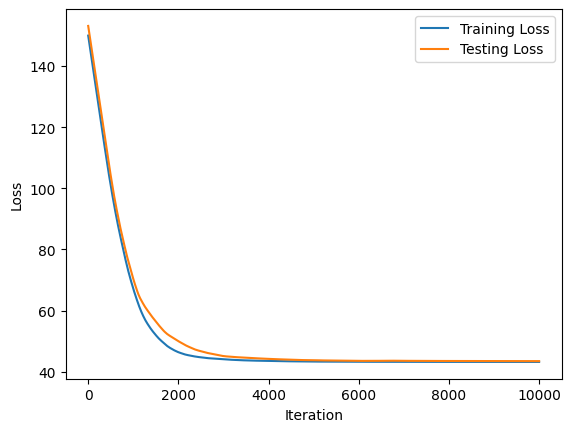

In [ ]:
# plot the traing losses (0.5 point) and testing losses (0.5 point)
# Plotting the training and testing losses
plt.plot(training_losses, label='Training Loss')
plt.plot(testing_losses, label='Testing Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.w.size()

torch.Size([10])

In [ ]:
model.b.size()

torch.Size([1])

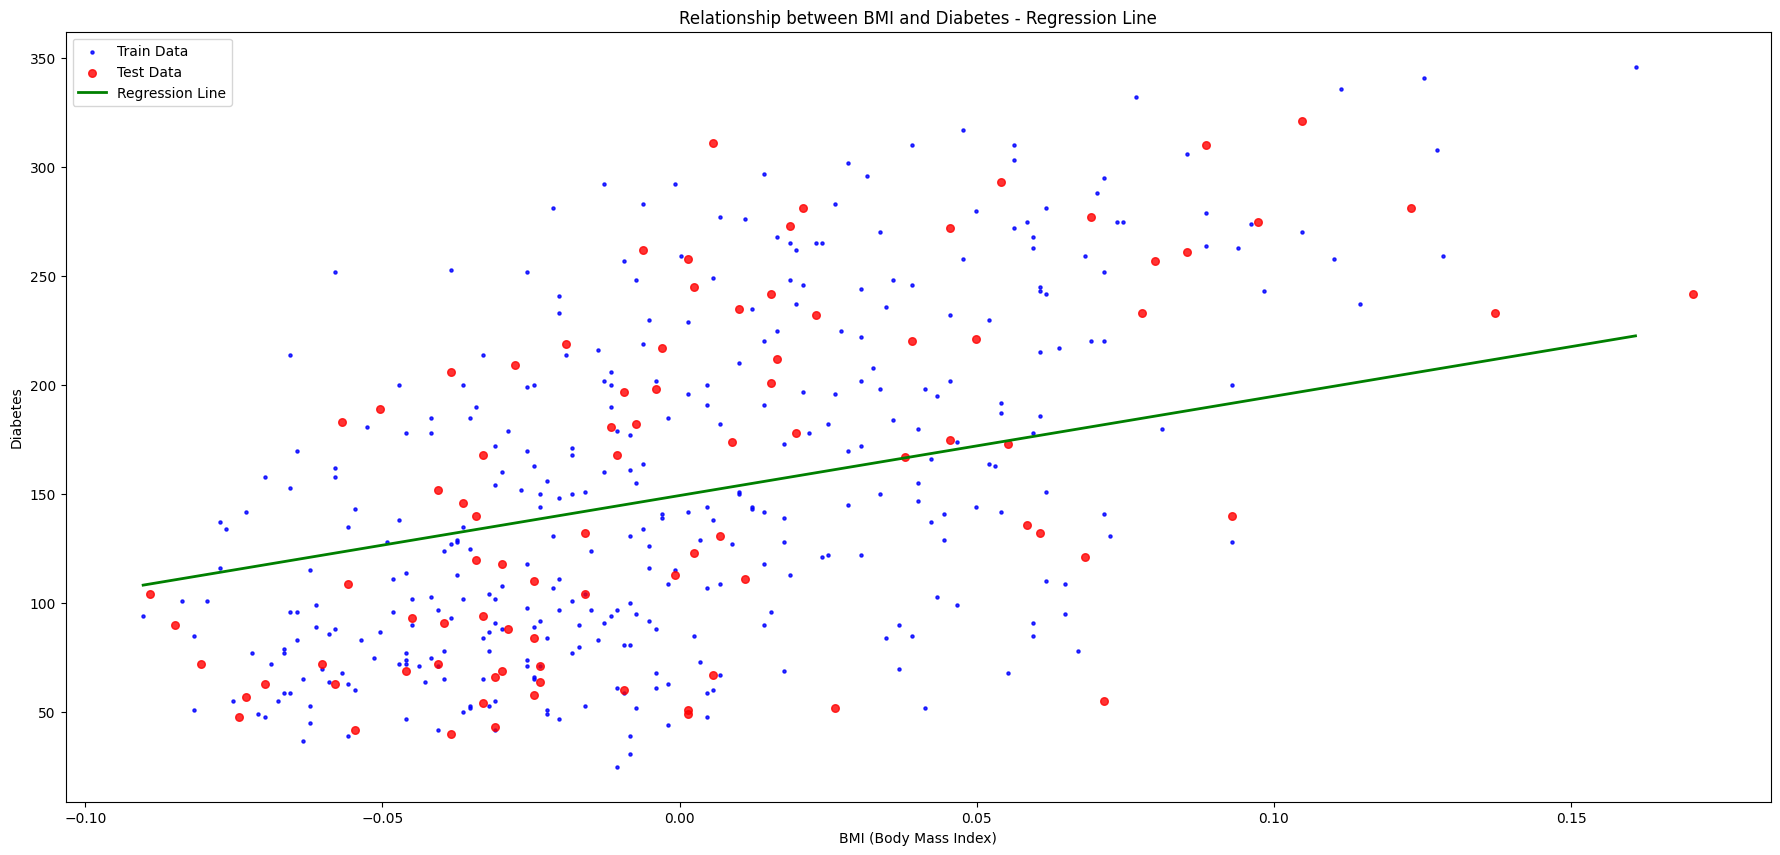

In [ ]:
# As our model contains a 10 dimensionsional input we will only plot the relationship between the third variable 'bmi' and the target.
# Again plot the train and test data (from Part1), and add a line where the slope and axis intercept are taken from the model parameters w and b
# (1 point)

# Create a figure with a specified size
plt.figure(figsize=(22, 10))
# Plotting train set with small blue dots and test set with large blue dot to diffentite visualization.
# Plot the third feature 'bmi' (diabetes_db['data'][:,2]) in relationship with the target y
plt.scatter(x_train[:, 2], y_train, label='Train Data', color='blue', s=5, alpha=0.8)
plt.scatter(x_test[:, 2], y_test, label='Test Data', color='red', s=30, alpha=0.8)

# Extract model parameters w and b
slope = model.w[2].item() #model.w.item()
intercept = model.b.item()

# Plotting the regression line
x_line = torch.linspace(x_train[:, 2].min(), x_train[:, 2].max(),100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, label='Regression Line', color='green', linewidth=2)

# Set plot title and axis labels
plt.title('Relationship between BMI and Diabetes - Regression Line')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Diabetes')
plt.legend()
plt.show()
